In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from esl.chapter03 import RidgeRegression, PrincipalComponentRegression, PartialLeastSquares, Lasso
from sklearn import preprocessing

### $\rho=0.5$

In [2]:
np.random.seed(14)
cov = 0.5 * np.ones((2, 2))
np.fill_diagonal(cov, 1)
mean = np.zeros(2)
beta = np.array([4, 2]).reshape(-1, 1)
x_raw = np.random.multivariate_normal(mean, cov, 300)
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x_raw)
y_raw_norm = (x_norm @ beta).reshape(-1)
y_raw_raw = (x_raw @ beta).reshape(-1)
y_raw = y_raw_raw - np.mean(y_raw_raw)
y_norm = y_raw_norm - np.mean(y_raw_norm)

#### Ridge Regression

In [3]:
beta_path_ridge = np.zeros((1000, 2))

param_space = np.logspace(0.1, 1e2, 1000, endpoint=True)[::-1]  #np.linspace(0, 1e5, 1000)[::-1]
for i, lambda_ in enumerate(param_space):
    ridge = RidgeRegression()
    ridge.fit(x_norm, y_norm, lambda_)
    beta_path_ridge[i, :] = ridge.beta_hat.reshape(-1)

#### Principal Component Regression

In [4]:
beta_path_pcr = np.zeros((3, 2))
for i, num_comp in enumerate([1, 2]):
    pcr = PrincipalComponentRegression(num_components=num_comp)
    pcr.fit(x_norm, y_norm)
    beta_path_pcr[i + 1, :] = pcr.beta_hat.reshape(-1)

#### Partial Least Squares

In [5]:
beta_path_pls = np.zeros((3, 2))

for i, num_dir in enumerate([1, 2]):
    pls = PartialLeastSquares(num_direction=num_dir)
    pls.fit(x_norm, y_norm)
    beta_path_pls[i + 1, :] = pls.beta_hat.reshape(-1)

#### Lasso

In [6]:
lasso = Lasso()
_, beta_path_lasso = lasso.fit(x_norm, y_norm)

#### Best Subset

In [7]:
subsets = [0, 1]
beta_path_subset = np.zeros((3, 2))
i = 0
for subset_size in range(1, len(subsets) + 1):
    subset = combinations(subsets, subset_size)
    subset = [list(i) for i in subset]
    
    best_error = np.inf
    for feature_index in subset:
        ridge = RidgeRegression()
        ridge.fit(x_norm[:, feature_index], y_norm, 0)
        
        y_hat = x_norm[:, feature_index] @ ridge.beta_hat
        error = (y_norm - y_hat).T @ (y_norm - y_hat)

        if error < best_error:
            beta_path_subset[i + 1, feature_index] = ridge.beta_hat.reshape(-1)
            best_error = error

    i += 1

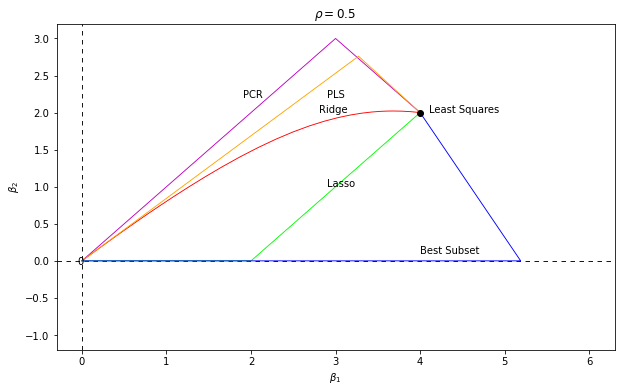

In [8]:
plt.figure(figsize=(10, 6))
plt.xlim([-0.3, 6.3])
plt.ylim([-1.2, 3.2])
x0 = np.linspace(-0.3, 6.3, 100)
y0 = np.linspace(-1.2, 3.2, 100)
plt.plot(np.zeros_like(y0), y0, color='black', linestyle=(0, (5, 5)), linewidth=0.9)
plt.plot(x0, np.zeros_like(x0), color='black', linestyle=(0, (5, 5)), linewidth=0.9)
plt.plot(beta_path_ridge[:, 0], beta_path_ridge[:, 1], 'r', linewidth=0.9)
plt.annotate('Ridge', xy=(2.8, 2))
plt.plot(beta_path_pcr[:, 0], beta_path_pcr[:, 1], 'm', linewidth=0.9)
plt.annotate('PCR', xy=(1.9, 2.2))
plt.plot(beta_path_pls[:, 0], beta_path_pls[:, 1], 'orange', linewidth=0.9)
plt.annotate('PLS', xy=(2.9, 2.2))
plt.plot(beta_path_lasso[0, :], beta_path_lasso[1, :], 'lime', linewidth=0.9)
plt.annotate('Lasso', xy=(2.9, 1))
plt.plot(beta_path_subset[:, 0], beta_path_subset[:, 1], 'blue', linewidth=0.9)
plt.annotate('Best Subset', xy=(4, 0.1))
plt.plot(4, 2, 'ko')
plt.annotate('Least Squares', xy=(4.1, 2))
plt.annotate('0', xy=(-0.05, -0.05))
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title(r'$\rho=0.5$')
plt.show()

### $\rho=-0.5$

In [9]:
np.random.seed(14)
cov = -0.5 * np.ones((2, 2))
np.fill_diagonal(cov, 1)
mean = np.zeros(2)
beta = np.array([4, 2]).reshape(-1, 1)
x_raw = np.random.multivariate_normal(mean, cov, 300)
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x_raw)
y_raw_norm = (x_norm @ beta).reshape(-1)
y_raw_raw = (x_raw @ beta).reshape(-1)
y_raw = y_raw_raw - np.mean(y_raw_raw)
y_norm = y_raw_norm - np.mean(y_raw_norm)

#### Ridge Regression

In [10]:
beta_path_ridge = np.zeros((1000, 2))

param_space = np.logspace(0.1, 1e2, 1000, endpoint=True)[::-1]  #np.linspace(0, 1e5, 1000)[::-1]
for i, lambda_ in enumerate(param_space):
    ridge = RidgeRegression()
    ridge.fit(x_norm, y_norm, lambda_)
    beta_path_ridge[i, :] = ridge.beta_hat.reshape(-1)

#### Principal Component Regression

In [11]:
beta_path_pcr = np.zeros((3, 2))
for i, num_comp in enumerate([1, 2]):
    pcr = PrincipalComponentRegression(num_components=num_comp)
    pcr.fit(x_norm, y_norm)
    beta_path_pcr[i + 1, :] = pcr.beta_hat.reshape(-1)

#### Partial Least Squares

In [12]:
beta_path_pls = np.zeros((3, 2))

for i, num_dir in enumerate([1, 2]):
    pls = PartialLeastSquares(num_direction=num_dir)
    pls.fit(x_norm, y_norm)
    beta_path_pls[i + 1, :] = pls.beta_hat.reshape(-1)

#### Lasso

In [13]:
lasso = Lasso()
_, beta_path_lasso = lasso.fit(x_norm, y_norm)

#### Best Subset

In [14]:
subsets = [0, 1]
beta_path_subset = np.zeros((3, 2))
i = 0
for subset_size in range(1, len(subsets) + 1):
    subset = combinations(subsets, subset_size)
    subset = [list(i) for i in subset]
    
    best_error = np.inf
    for feature_index in subset:
        ridge = RidgeRegression()
        ridge.fit(x_norm[:, feature_index], y_norm, 0)
        
        y_hat = x_norm[:, feature_index] @ ridge.beta_hat
        error = (y_norm - y_hat).T @ (y_norm - y_hat)

        if error < best_error:
            beta_path_subset[i + 1, feature_index] = ridge.beta_hat.reshape(-1)
            best_error = error

    i += 1

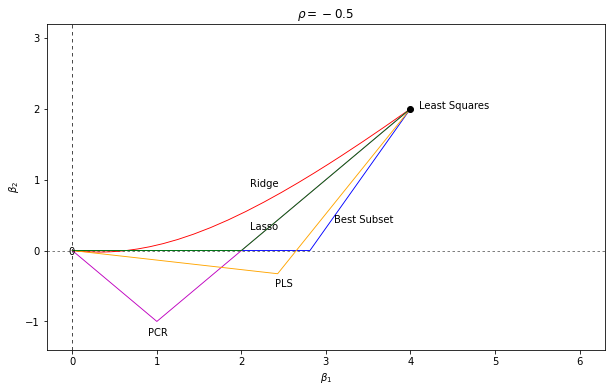

In [15]:
plt.figure(figsize=(10, 6))
plt.xlim([-0.3, 6.3])
plt.ylim([-1.4, 3.2])
x0 = np.linspace(-0.3, 6.4, 100)
y0 = np.linspace(-1.4, 3.2, 100)
plt.plot(np.zeros_like(y0), y0, color='black', linestyle=(0, (5, 5)), linewidth=0.7)
plt.plot(x0, np.zeros_like(x0), color='black', linestyle=(0, (5, 5)), linewidth=0.5)
plt.plot(beta_path_ridge[:, 0], beta_path_ridge[:, 1], 'r', linewidth=0.9)
plt.annotate('Ridge', xy=(2.1, 0.9))
plt.plot(beta_path_subset[:, 0], beta_path_subset[:, 1], 'blue', linewidth=0.9)
plt.annotate('Best Subset', xy=(3.1, 0.4))
plt.plot(beta_path_pcr[:, 0], beta_path_pcr[:, 1], 'm', linewidth=0.9)
plt.annotate('PCR', xy=(0.9, -1.2))
plt.plot(beta_path_pls[:, 0], beta_path_pls[:, 1], 'orange', linewidth=0.9)
plt.annotate('PLS', xy=(2.4, -0.5))
plt.plot(beta_path_lasso[0, :], beta_path_lasso[1, :], 'green', linewidth=0.9)
plt.annotate('Lasso', xy=(2.1, 0.3))

plt.plot(4, 2, 'ko')
plt.annotate('Least Squares', xy=(4.1, 2))
plt.annotate('0', xy=(-0.05, -0.05))
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title(r'$\rho=-0.5$')
plt.show()